<a href="https://colab.research.google.com/github/S-Delowar/AiQuest_DS_ML/blob/main/KMeans_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('mall customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.rename(columns={'Gender':'gender', 'Age':'age','Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)

In [ ]:
df.head()

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df = df.drop('CustomerID', axis=1)

In [ ]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df[['gender']])

In [ ]:
df.head()

,gender,age,income,score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
df.describe()

,gender,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


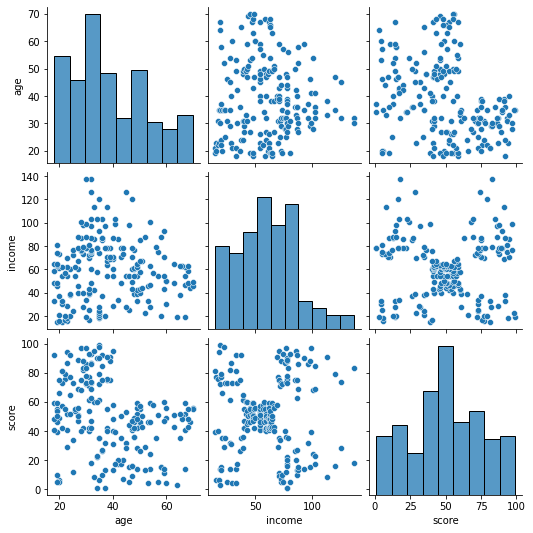

In [ ]:
# pairplot
import seaborn as sns
sns.pairplot(df[['age','income','score']])

In [ ]:
# ['income', 'score'] performs better

# **KMeans Cluster**

In [ ]:
import sklearn.cluster as cluster


***Find Optimal Number of cluster ***

In [ ]:
wcss =[]
clusters = range(1,15)
for k in clusters:
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(df[['income','score']])
  wcss.append(kmeans.inertia_) 

In [ ]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30227.606513152008,
 24986.52564064288,
 21850.165282585636,
 19704.12354314778,
 17595.28888108518,
 15838.717785514087,
 14350.256180094415,
 13279.52516674147]

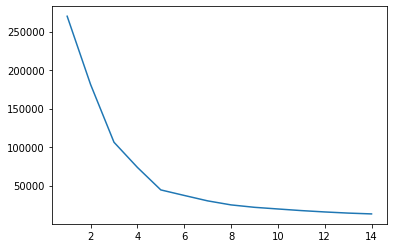

In [ ]:
plt.plot(clusters, wcss)

In [ ]:
# Knee to see the accurate value of elbow
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kneed import KneeLocator
kn = KneeLocator(clusters, wcss, curve='convex', direction='decreasing')

In [ ]:
kn.knee

5

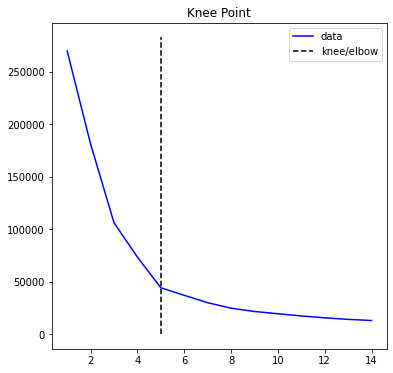

In [ ]:
kn.plot_knee()

In [ ]:
kmeans = cluster.KMeans(n_clusters=5)
predicted = kmeans.fit_predict(df[['income','score']])

In [ ]:
df['new_cluster'] = predicted

In [ ]:
df.head()

,gender,age,income,score,new_cluster
0,1,19,15,39,0
1,1,21,15,81,3
2,0,20,16,6,0
3,0,23,16,77,3
4,0,31,17,40,0


In [ ]:
df.tail()

,gender,age,income,score,new_cluster
195,0,35,120,79,1
196,0,45,126,28,2
197,1,32,126,74,1
198,1,32,137,18,2
199,1,30,137,83,1


In [ ]:
centers = kmeans.cluster_centers_
centers

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852]])

In [ ]:
df0 = df[df.new_cluster == 0]
df1 = df[df.new_cluster == 1]
df2 = df[df.new_cluster == 2]
df3 = df[df.new_cluster == 3]
df4 = df[df.new_cluster == 4]

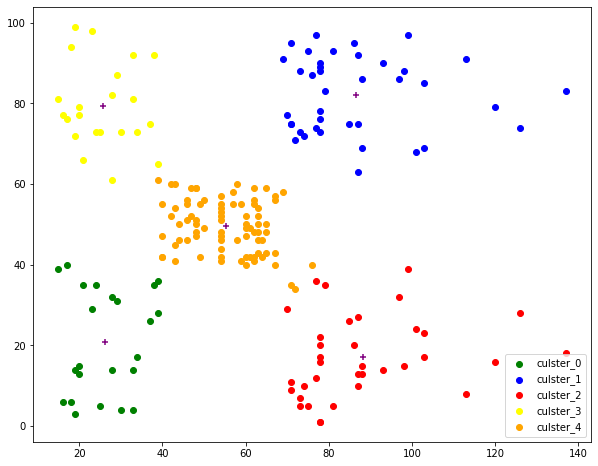

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df0['income'], df0['score'], color='green', label='culster_0')
plt.scatter(df1['income'], df1['score'], color='blue', label='culster_1')
plt.scatter(df2['income'], df2['score'], color='red', label='culster_2')
plt.scatter(df3['income'], df3['score'], color='yellow', label='culster_3')
plt.scatter(df4['income'], df4['score'], color='orange', label='culster_4')

plt.scatter(centers[:,0], centers[:,1], color='purple', marker='+')

plt.legend()


In [ ]:
kmeans.predict([[15,42]])

array([0], dtype=int32)